<a href="https://colab.research.google.com/github/jecan95/Reconnaissance_de_chiffre/blob/main/Reconnaissance_de_chiffre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet de vision par ordinateur pour reconnaissance de chiffres

Pour retrouver toutes les codes ou données pertinents pour ce projet, utilisez le lien suivant : https://github.com/jecan95/Reconnaissance_de_chiffre.git

L'objectif de ce projet personnel, réalisé en dehors du cadre scolaire, était d'utiliser mes connaissances acquises lors de mes études pour créer un réseau de neurones capable de reconnaître des chiffres à partir de la caméra de mon ordinateur. Pour créer un tel modèle, il est nécessaire de suivre les étapes classiques d'un projet de machine learning, qui consistent à :

* Préparer les données d'entraînement nécessaires
* Construire le modèle de réseau neuronal
* Entraîner ce modèle en utilisant les données d'entraînement
* Utiliser ce modèle pour faire des prédictions sur des données inconnues.

## Préparation du jeu de de données

### Importation des données (MNIST)

MNIST est l'acronyme de "Modified National Institute of Standards and Technology" (Institut national américain des normes et de la technologie modifié). Il s'agit d'une base de données de chiffres manuscrits qui est largement utilisée dans le domaine de l'apprentissage automatique pour évaluer les performances des modèles de reconnaissance de caractères. Elle a été créée par Yann LeCun, Corinna Cortes et Christopher Burges en 1998.

La base de données contient 60 000 exemples d'entraînement et 10 000 exemples de test. Chacun des exemples est une image en niveaux de gris de 28x28 pixels représentant un chiffre manuscrit entre 0 et 9 . L'objectif pour les modèles d'apprentissage automatique est de s'entraîner sur les données d'entraînement pour être capable de reconnaître les chiffres manuscrits dans les données de test.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from scipy import ndimage as nd
from skimage.filters import roberts, sobel, scharr, prewitt
import skimage as io 
import cv2
import random
from collections import Counter
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from PIL import Image

1) J'importe les données de la base MNIST pour de la reconnaissance de chiffres

In [ ]:
# Charger l'ensemble de données MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


# Normaliser les données d'entraînement et de test
x_train, x_test = x_train / 255.0, x_test / 255.0

### Prétraitement des images

2) Pour améliorer les performances de mon réseau de neurones, j'ai augmenté le nombre d'images en appliquant des filtres sur notre base de données. Le **prétraitement d'image** consiste à appliquer des filtres ou des transformations sur les images avant de les soumettre au modèle. Cela permet de fournir des données plus propres et plus faciles à traiter, ce qui peut améliorer les performances du modèle. Il existe différentes techniques de prétraitement d'image, telles que l'ajout de bruit blanc, le seuillage, le flou gaussien, etc. qui peut être appliqué sur les images avant de les soumettre au modèle.

* Filtre de Roberts

In [ ]:
for i, j in zip(x_train[0:4000,:,:], y_train[0:4000]):
    # instructions à exécuter pour chaque couple (i, j)
    edge_roberts_x = roberts(i)
    input_img_x = np.expand_dims(edge_roberts_x,axis=0)
    x_train = np.vstack((x_train, input_img_x))
    y_train = np.append(y_train,j)
    
print("D(x_train) = ", x_train.shape)
print("D(y_train) = ", y_train.shape)

D(x_train) =  (64000, 28, 28)
D(y_train) =  (64000,)


In [ ]:
for i, j in zip(x_test[0:5000,:,:], y_test[0:5000]):
    # instructions à exécuter pour chaque couple (i, j)
    edge_roberts_x = roberts(i)
    input_img_x = np.expand_dims(edge_roberts_x,axis=0)
    x_test = np.vstack((x_test, input_img_x))
    y_test = np.append(y_test,j)
    
print("D(x_test) = ", x_test.shape)
print("D(y_test) = ", y_test.shape)

D(x_test) =  (15000, 28, 28)
D(y_test) =  (15000,)


* Filtre de Sobel

In [ ]:
for i, j in zip(x_train[0:10000,:,:], y_train[0:10000]):
    # instructions à exécuter pour chaque couple (i, j)
    edge_sobel = sobel(i)
    input_img = np.expand_dims(edge_sobel,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_train) = ", x_train.shape)
print("D(y_train) = ", y_train.shape)

D(x_train) =  (74000, 28, 28)
D(y_train) =  (74000,)


In [ ]:
for i, j in zip(x_test[0:5000,:,:], y_test[0:5000]):
    # instructions à exécuter pour chaque couple (i, j)
    edge_sobel = sobel(i)
    input_img = np.expand_dims(edge_sobel,axis=0)
    x_test = np.vstack((x_test, input_img))
    y_test = np.append(y_test,j)
    
print("D(x_test) = ", x_test.shape)
print("D(y_test) = ", y_test.shape)

D(x_test) =  (20000, 28, 28)
D(y_test) =  (20000,)


* Le filtre de Scharr

In [ ]:
for i, j in zip(x_train[0:10000,:,:], y_train[0:10000]):
    # instructions à exécuter pour chaque couple (i, j)
    edge_scharr = scharr(i)
    input_img = np.expand_dims(edge_scharr,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_train) = ", x_train.shape)
print("D(y_train) = ", y_train.shape)

D(x_train) =  (84000, 28, 28)
D(y_train) =  (84000,)


In [ ]:
for i, j in zip(x_test[0:5000,:,:], y_test[0:5000]):
    # instructions à exécuter pour chaque couple (i, j)
    edge_scharr = scharr(i)
    input_img = np.expand_dims(edge_scharr,axis=0)
    x_test = np.vstack((x_test, input_img))
    y_test = np.append(y_test,j)
    
print("D(x_test) = ", x_test.shape)
print("D(y_test) = ", y_test.shape)

D(x_test) =  (25000, 28, 28)
D(y_test) =  (25000,)


* Le filtre de Prewitt

In [ ]:
for i, j in zip(x_train[0:10000,:,:], y_train[0:10000]):
    # instructions à exécuter pour chaque couple (i, j)
    edge_prewitt = prewitt(i)
    input_img = np.expand_dims(edge_prewitt,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_train) = ", x_train.shape)
print("D(y_train) = ", y_train.shape)

D(x_train) =  (94000, 28, 28)
D(y_train) =  (94000,)


In [ ]:
for i, j in zip(x_test[0:5000,:,:], y_test[0:5000]):
    # instructions à exécuter pour chaque couple (i, j)
    edge_prewitt = prewitt(i)
    input_img = np.expand_dims(edge_prewitt,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_test) = ", x_test.shape)
print("D(y_test) = ", y_test.shape)

D(x_test) =  (25000, 28, 28)
D(y_test) =  (25000,)


* Le filtre gaussien de sigma 3

In [ ]:
for i, j in zip(x_train[0:10000,:,:], y_train[0:10000]):
    # instructions à exécuter pour chaque couple (i, j)
    gaussian_img = nd.gaussian_filter(i, sigma=3)
    input_img = np.expand_dims(gaussian_img,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_train) = ", x_train.shape)
print("D(y_train) = ", y_train.shape)

D(x_train) =  (104000, 28, 28)
D(y_train) =  (104000,)


In [ ]:
for i, j in zip(x_test[0:5000,:,:], y_test[0:5000]):
    # instructions à exécuter pour chaque couple (i, j)
    gaussian_img = nd.gaussian_filter(i, sigma=3)
    input_img = np.expand_dims(gaussian_img,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_test) = ", x_test.shape)
print("D(y_test) = ", y_test.shape)

D(x_test) =  (25000, 28, 28)
D(y_test) =  (25000,)


* Le filtre gaussien de sigma 7

In [ ]:
for i, j in zip(x_train[0:10000,:,:], y_train[0:10000]):
    # instructions à exécuter pour chaque couple (i, j)
    gaussian_img = nd.gaussian_filter(i, sigma=7)
    input_img = np.expand_dims(gaussian_img,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_train) = ", x_train.shape)
print("D(y_train) = ", y_train.shape)

D(x_train) =  (114000, 28, 28)
D(y_train) =  (114000,)


In [ ]:
for i, j in zip(x_test[0:5000,:,:], y_test[0:5000]):
    # instructions à exécuter pour chaque couple (i, j)
    gaussian_img = nd.gaussian_filter(i, sigma=7)
    input_img = np.expand_dims(gaussian_img,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_test) = ", x_test.shape)
print("D(y_test) = ", y_test.shape)

D(x_test) =  (25000, 28, 28)
D(y_test) =  (25000,)


* Le filtre moyenneur 

In [ ]:
for i, j in zip(x_train[0:10000,:,:], y_train[0:10000]):
    # instructions à exécuter pour chaque couple (i, j)
    median_img = nd.median_filter(i, size=3)
    input_img = np.expand_dims(median_img,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_train) = ", x_train.shape)
print("D(y_train) = ", y_train.shape)

D(x_train) =  (124000, 28, 28)
D(y_train) =  (124000,)


In [ ]:
for i, j in zip(x_test[0:5000,:,:], y_test[0:5000]):
    # instructions à exécuter pour chaque couple (i, j)
    median_img = nd.median_filter(i, size=3)
    input_img = np.expand_dims(median_img,axis=0)
    x_train = np.vstack((x_train, input_img))
    y_train = np.append(y_train,j)
    
print("D(x_test) = ", x_test.shape)
print("D(y_test) = ", y_test.shape)

D(x_test) =  (25000, 28, 28)
D(y_test) =  (25000,)


### Data augmentation

3) Pour cette partie, je vais utiliser de la data augmentation, la **data augmentation** consiste à générer de nouvelles données à partir des données d'entraînement existantes en appliquant différentes transformations (rotation, miroir, etc.). Cela peut aider le modèle à mieux généraliser et à mieux performer sur des données inconnues. Vous pouvez utiliser la bibliothèque '*imgaug*' pour appliquer facilement de la data augmentation à vos données d'entraînement. Avant chaque cellule de programmation, il est indiqué la nature de la modification des images.

Flouter les images en utilisant des noyaux gaussiens.

In [ ]:
# Convertir x_train et x_test en float32
x_train1 = x_train.astype(np.float32)[60000:120000,:,:]
x_test1 = x_test.astype(np.float32)[0:25000,:,:]

y_train1 = y_train[60000:120000]
y_test1 = y_test[0:25000]

# Définir l'augmenteur à utiliser
aug = iaa.GaussianBlur(sigma=(0.0, 3.0))

# Appliquer l'augmentation sur les données d'entraînement et de test
x_train_aug = seq.augment_images(x_train1)
x_test_aug = seq.augment_images(x_test1)

# Vérifier les dimensions des données d'entraînement et de test augmentées
print(x_train_aug.shape) 
print(x_test_aug.shape) 

#Fusionner les nouveaux données avec les autres
x_train = np.concatenate((x_train, x_train_aug))
y_train = np.concatenate((y_train, y_train1))

x_test = np.concatenate((x_test, x_test_aug))
y_test = np.concatenate((y_test, y_test1))

#Vérifier la taille des tableaux
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

(60000, 28, 28)
(25000, 28, 28)
(50000, 28, 28) (50000,)
(184000, 28, 28) (184000,)


Redimensionner les images à une valeur de 20 à 170 % de leur taille d'origine

In [ ]:
# Convertir x_train et x_test en float32
x_train1 = x_train.astype(np.float32)[60000:120000,:,:]
x_test1 = x_test.astype(np.float32)[0:25000,:,:]

y_train1 = y_train[60000:120000]
y_test1 = y_test[0:25000]

# Définir l'augmenteur à utiliser
aug = iaa.Affine(scale=(0.2, 1.7))

# Appliquer l'augmentation sur les données d'entraînement et de test
x_train_aug = seq.augment_images(x_train1)
x_test_aug = seq.augment_images(x_test1)

# Vérifier les dimensions des données d'entraînement et de test augmentées
print(x_train_aug.shape) 
print(x_test_aug.shape) 

#Fusionner les nouveaux données avec les autres
x_train = np.concatenate((x_train, x_train_aug))
y_train = np.concatenate((y_train, y_train1))

x_test = np.concatenate((x_test, x_test_aug))
y_test = np.concatenate((y_test, y_test1))

#Vérifier la taille des tableaux
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

(60000, 28, 28)
(25000, 28, 28)
(75000, 28, 28) (75000,)
(244000, 28, 28) (244000,)


Redimensionnez les images à une valeur de 20 à 170 % de leur taille d'origine, mais effectué indépendamment par axe

In [ ]:
# Convertir x_train et x_test en float32
x_train1 = x_train.astype(np.float32)[60000:120000,:,:]
x_test1 = x_test.astype(np.float32)[0:25000,:,:]

y_train1 = y_train[60000:120000]
y_test1 = y_test[0:25000]

# Définir l'augmenteur à utiliser
aug = iaa.Affine(scale={"x": (0.2, 1.7), "y": (0.2, 1.7)})

# Appliquer l'augmentation sur les données d'entraînement et de test
x_train_aug = seq.augment_images(x_train1)
x_test_aug = seq.augment_images(x_test1)

# Vérifier les dimensions des données d'entraînement et de test augmentées
print(x_train_aug.shape) 
print(x_test_aug.shape) 

#Fusionner les nouveaux données avec les autres
x_train = np.concatenate((x_train, x_train_aug))
y_train = np.concatenate((y_train, y_train1))

x_test = np.concatenate((x_test, x_test_aug))
y_test = np.concatenate((y_test, y_test1))

#Vérifier la taille des tableaux
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

(60000, 28, 28)
(25000, 28, 28)
(100000, 28, 28) (100000,)
(304000, 28, 28) (304000,)


"Traduire" (=déplacer) les images de -20 à +20 % sur les axes x et y indépendamment

In [ ]:
# Convertir x_train et x_test en float32
x_train1 = x_train.astype(np.float32)[60000:120000,:,:]
x_test1 = x_test.astype(np.float32)[0:25000,:,:]

y_train1 = y_train[60000:120000]
y_test1 = y_test[0:25000]

# Définir l'augmenteur à utiliser
aug = iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})

# Appliquer l'augmentation sur les données d'entraînement et de test
x_train_aug = seq.augment_images(x_train1)
x_test_aug = seq.augment_images(x_test1)

# Vérifier les dimensions des données d'entraînement et de test augmentées
print(x_train_aug.shape) 
print(x_test_aug.shape) 

#Fusionner les nouveaux données avec les autres
x_train = np.concatenate((x_train, x_train_aug))
y_train = np.concatenate((y_train, y_train1))

x_test = np.concatenate((x_test, x_test_aug))
y_test = np.concatenate((y_test, y_test1))

#Vérifier la taille des tableaux
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

(60000, 28, 28)
(25000, 28, 28)
(125000, 28, 28) (125000,)
(364000, 28, 28) (364000,)


Faire pivoter les images de -45 à 45 degrés

In [ ]:
# Convertir x_train et x_test en float32
x_train1 = x_train.astype(np.float32)[60000:120000,:,:]
x_test1 = x_test.astype(np.float32)[0:25000,:,:]

y_train1 = y_train[60000:120000]
y_test1 = y_test[0:25000]

# Définir l'augmenteur à utiliser
aug = iaa.Affine(rotate=(-45, 45))

# Appliquer l'augmentation sur les données d'entraînement et de test
x_train_aug = seq.augment_images(x_train1)
x_test_aug = seq.augment_images(x_test1)

# Vérifier les dimensions des données d'entraînement et de test augmentées
print(x_train_aug.shape) 
print(x_test_aug.shape) 

#Fusionner les nouveaux données avec les autres
x_train = np.concatenate((x_train, x_train_aug))
y_train = np.concatenate((y_train, y_train1))

x_test = np.concatenate((x_test, x_test_aug))
y_test = np.concatenate((y_test, y_test1))

#Vérifier la taille des tableaux
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

(60000, 28, 28)
(25000, 28, 28)
(150000, 28, 28) (150000,)
(424000, 28, 28) (424000,)


In [ ]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)

## Modéle de réseau de neurones convolutifs

### Construction et entrainement de mon modèle 

Un réseau de neurones convolutif (CNN, pour Convolutional Neural Network en anglais) est un type de modèle de réseau de neurones utilisé pour les tâches de traitement d'images et de vision par ordinateur. Les réseaux de neurones convolutifs se basent sur l'idée des filtres et des fenêtres glissantes pour extraire des caractéristiques de l'image. Les filtres sont des matrices de poids qui sont appliquées sur des sous-parties de l'image, généralement appelées des fenêtres glissantes, pour extraire des caractéristiques spécifiques de l'image, comme les contours, les textures, etc.

Un des points importants des CNN est qu'ils utilisent des couches de convolution pour analyser l'image, elles permettent de conserver la spatialité de l'image (l'emplacement des objets dans l'image) pendant le traitement.
Ces couches de convolution sont généralement suivies de couches de pooling qui permettent de réduire la résolution de l'image tout en conservant les caractéristiques importantes. Ces couches successives de convolution et de pooling permettent d'extraire des caractéristiques plus abstraites à mesure que les données passent à travers le réseau.

Les CNNs sont souvent utilisé pour des tâches de reconnaissance d'image, classification d'image, segmentation d'image, etc. ils ont aussi montrés de bon résultat pour des tâches de traitement du langage, traitement de la parole et de la vidéo. Ils ont montrés de bons résultats sur les bases de données standard comme MNIST, CIFAR et ImageNet, et sont largement utilisés dans l'industrie pour des tâches de reconnaissance d'image et de traitement de l'image. D'où, mon usage de ce réseau pour mon projet. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from scipy import ndimage as nd
from skimage.filters import roberts, sobel, scharr, prewitt
import skimage as io 
import cv2
import random
from collections import Counter
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap

In [ ]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")

In [ ]:
print(x_train.shape,y_train.shape)

(424000, 28, 28) (424000,)


In [ ]:
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [ ]:
print(x_test.shape,y_test.shape)

(150000, 28, 28) (150000,)


In [ ]:
# Créer le modèle
model = tf.keras.Sequential()

# Ajouter les couches de convolution et de pooling
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())

# Ajouter les couches fully-connected
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle sur les données d'entraînement

history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    verbose=1,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    shuffle=False)

Epoch 1/15
6625/6625 [==============================] - 501s 75ms/step - loss: 0.3055 - accuracy: 0.9047 - val_loss: 0.1368 - val_accuracy: 0.9568
Epoch 2/15
6625/6625 [==============================] - 516s 78ms/step - loss: 0.1871 - accuracy: 0.9400 - val_loss: 0.0990 - val_accuracy: 0.9692
Epoch 3/15
6625/6625 [==============================] - 504s 76ms/step - loss: 0.1566 - accuracy: 0.9499 - val_loss: 0.0805 - val_accuracy: 0.9743
Epoch 4/15
6625/6625 [==============================] - 498s 75ms/step - loss: 0.1382 - accuracy: 0.9558 - val_loss: 0.0900 - val_accuracy: 0.9720
Epoch 5/15
6625/6625 [==============================] - 653s 99ms/step - loss: 0.1278 - accuracy: 0.9587 - val_loss: 0.0795 - val_accuracy: 0.9756
Epoch 6/15
6625/6625 [==============================] - 483s 73ms/step - loss: 0.1182 - accuracy: 0.9616 - val_loss: 0.0794 - val_accuracy: 0.9757
Epoch 7/15
6625/6625 [==============================] - 490s 74ms/step - loss: 0.1125 - accuracy: 0.9635 - val_loss: 0

## Analyse des performances de notre modèle

Pour analyser la performances de notre réseau de neurones, nous avons deux outils : 
* La fonction de perte (loss function en anglais) est une fonction mathématique utilisée pour évaluer la performance d'un modèle de réseau de neurones. Elle permet de mesurer la différence entre les prédictions du modèle et les valeurs réelles pour un ensemble de données d'entraînement. Plus précisément, la fonction de perte calcule un score numérique qui reflète la « distance » entre les prédictions et les valeurs réelles. 

* La précision (accuracy en anglais) est un autre indicateur utilisé pour évaluer la performance d'un modèle de réseau de neurones. Il mesure la proportion de prédictions correctes par rapport au nombre total de prédictions. Plus la précision est élevée, plus les prédictions sont correctes et plus le modèle est considéré comme performant.

Il est important de noter que la précision n'est pas toujours la meilleure métrique pour évaluer la performance des modèles de réseau de neurones, il est important de tenir compte de la tâche pour laquelle le modèle est utilisé et du contexte. Certaines tâches, comme la détection des anomalies ou les tâches de classification binaire peuvent utiliser des métriques comme le AUC-ROC ou la courbe de précision-rappel plutôt que la précision. Il est important d'utiliser la métrique appropriée pour évaluer la performance du modèle.


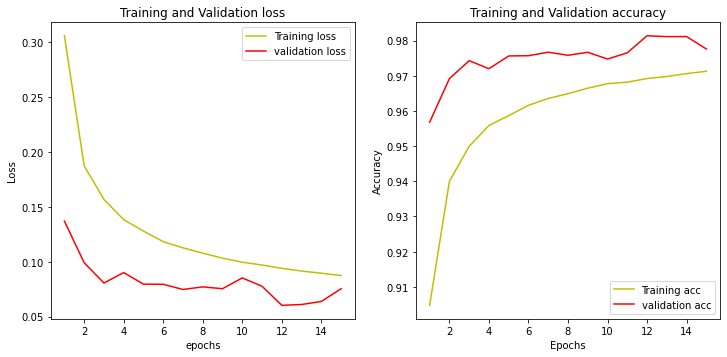

In [ ]:
# Récupérez la liste des pertes d'entraînement et de validation
loss = history.history['loss']
val_loss = history.history['val_loss']

# Générez une liste d'époques
epochs = range(1, len(loss) + 1)

# Récupérez la liste des exactitudes d'entraînement et de validation
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

fig = plt.figure(figsize=(12,12))
# Tracez les courbes de perte d'entraînement et de validation
plt.subplot(2, 2, 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs,val_loss,"r", label ="validation loss")
plt.title ("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 2)
# Tracez les courbes d'exactitude d'entraînement et de validation
plt.plot(epochs,acc,"y", label ="Training acc")
plt.plot(epochs,val_acc,"r", label ="validation acc")
plt.title ("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

A partir des graphes ci-dessus, nous pouvons observer que les pertes d'entraînement diminuent à mesure que le nombre d'épisodes ou itérations augmente avant d'atteindre un plateau autour de 0.1. Inversement, les précisions d'entraînement augmentent avant d'atteindre une asymptote autour de 0.96. Alors que les précisions et les pertes de validation restent relativement constantes, respectivement entre 0.97 et 0.98 pour les précisions et entre 0.07 et 0.08 pour les pertes. Ainsi, 15 épisodes suffisent pour l'apprentissage de notre réseau de neurones. Si les épisodes sont trop nombreux, on risque d'avoir un sur-apprentissage, un phénomène dans lequel un modèle de réseau de neurones est trop bien adapté aux données d'entraînement et ne peut pas généraliser correctement aux nouvelles données.

In [ ]:
# Enregistrer le modèle
model.save("mon_modele_mnist_convolutifs3.h5")

## Les prédictions de notre modèle

Ici, nous sélectionnons des images dans notre base de données pour vérifier si les prédictions de notre modèle sont correctes.

1/1 [==============================] - 0s 143ms/step
Prédiction de cette image : 1.0
1/1 [==============================] - 0s 20ms/step
[[6.8048422e-10 9.9997973e-01 4.5754507e-07 5.8070286e-06 3.8193065e-07
  3.4374006e-07 1.9015144e-07 1.7728062e-06 4.7325105e-07 1.0738354e-05]]


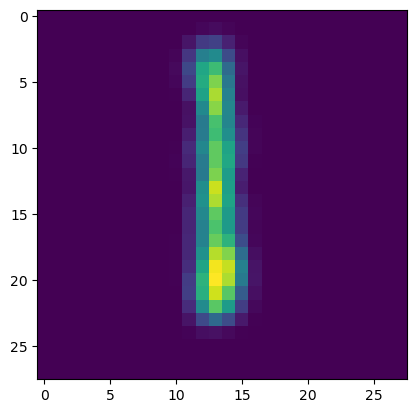

In [ ]:
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

tab = np.linspace(0,10,11)
n = random.randint(0,len(x_test)-1)
img = x_test[n] 

# Prédire l'étiquette de l'image
input_img = np.expand_dims(img,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(img)

## Observations et test du réseau de neurones en vision par ordinateur

Dans cette dernière partie, je vais partager mes observations de mon modèle que j'ai effectué à partir de la caméra de mon ordinateur et des chiffres que j'ai écrit. Les chiffres sont entre 0 et 9, il peut exister une version différentes d'un meme chiffre pour tester l'efficacité du modèle. J'ai programmé un code qui permet d'enregistrer toutes les valeurs prédite par le modèle lorsque la caméra est activée et analyser les performances du modèle. Nous allons tester tous les chiffres que j'ai griffonnés par caméra, puis faire la prédiction comme dans la partie précédente. 

Les observations faites dans le cadre de ce projet ont été assez rapide. En effet, l'objectif de ce projet a été de mettre en application mes connaissances nouvellement acquises lors lors ma formation d'ingénieur. Néanmoins, je trouve que c'est partie est toute aussi intéressante à faire car elle peut montrer comment les jeu de données peuvent influencer les résultats de notre modèle et, ainsi, ses limites.  

* ### 0

<img src="./numéros/petit_zéro.jpg" 
     align="center" 
     width="300" />

Le programme de vision par ordinateur parvient à reconnaitre générer 62 % pour le chiffre 0 et 32 % pour 9. Donc, globalement, il eu une réel reconnaissance faite par le modèle mais avec beaucoup d'erreurs. Il y a une réelle influence en terme de la position de l'image sur la caméra, de la luminosité sur nos résultats. A gauche de la caméra et avec un bon éclairage, la performance est le meilleur. 

L'image a été chargée avec succès
1/1 [==============================] - 0s 162ms/step
Prédiction de cette image : 0.0
1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


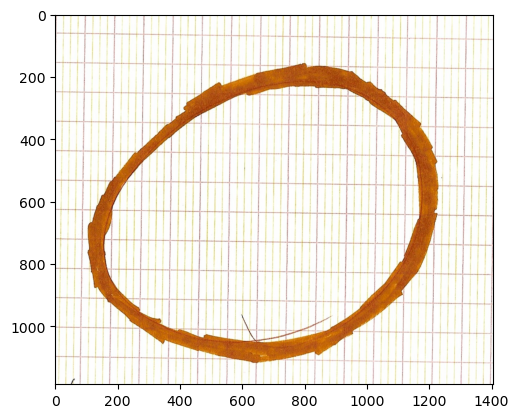

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_zero.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction correspond à la réalité.

* ### 1

<img src="./numéros/petit_un.jpg" 
     align="center" 
     width="200" />

Cette fois-ci, le programme n'est pas parvenu à reconnaitre le bon numéro. A la place, nous avons eu 36 % de 0 et 20 % de 8.

L'image a été chargée avec succès
1/1 [==============================] - 0s 153ms/step
Prédiction de cette image : 0.0
1/1 [==============================] - 0s 18ms/step
[[9.7773826e-01 0.0000000e+00 3.6463852e-23 0.0000000e+00 3.9433983e-26
  4.3866496e-31 2.2107907e-02 0.0000000e+00 1.5385414e-04 0.0000000e+00]]


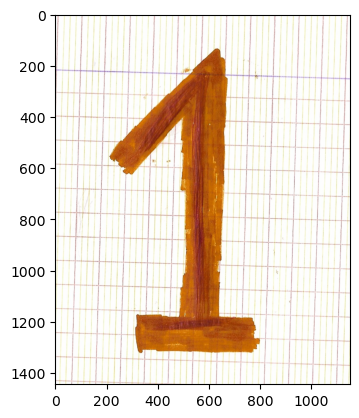

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_un.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité. Mais il y a bien une adéquation entre les résultats par la caméra et la prédiction.

<img src="./numéros/grand_un.jpg" 
     align="center" 
     width="100" />

Meme constate que le résultat précédent, mais avec 69 % de 0 et 16 % de 0.

L'image a été chargée avec succès
1/1 [==============================] - 0s 145ms/step
Prédiction de cette image : 8.0
1/1 [==============================] - 0s 20ms/step
[[3.4964503e-06 0.0000000e+00 3.4487619e-21 5.6468117e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999654e-01 5.0351433e-34]]


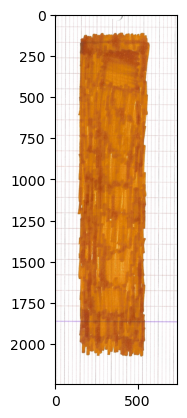

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\grand_un.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

* ### 2

<img src="./numéros/petit_deux.jpg" 
     align="center" 
     width="250" />

Le modèle parvient à reconnaitre le chiffre avec 50 % de bonnes réponses et 41 % pour 0. 

L'image a été chargée avec succès
1/1 [==============================] - 0s 155ms/step
Prédiction de cette image : 3.0
1/1 [==============================] - 0s 20ms/step
[[2.3998558e-23 0.0000000e+00 1.0782665e-03 9.9892175e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 5.2221174e-27 1.0687137e-24]]


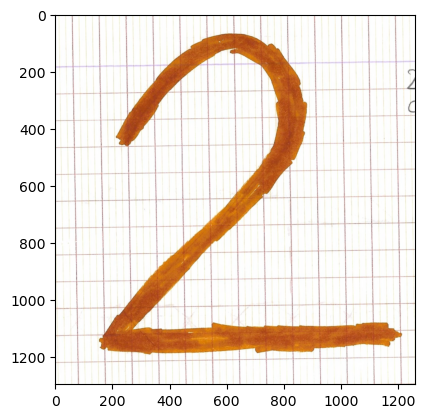

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_deux.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

<img src="./numéros/grand_deux.jpg" 
     align="center" 
     width="250" />

Les bonnes réponses montent à 61 % avec cette image contre 21 % pour 0. La reconnaissance est meilleure à la gauche de la céméra. Il ets possible que la reconnaissance est meilleure parce le trait de ce chiffre est plus épais que celui du précédent.

L'image a été chargée avec succès
1/1 [==============================] - 0s 164ms/step
Prédiction de cette image : 2.0
1/1 [==============================] - 0s 19ms/step
[[1.0531315e-32 0.0000000e+00 9.8845136e-01 8.8960651e-20 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1548708e-02 5.0484053e-29]]


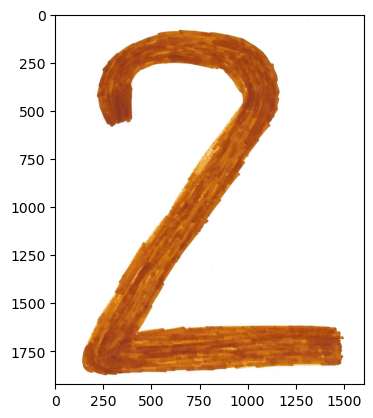

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\grand_deux.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction correspond à la réalité et valide notre observation sur le trait du chiffre.

* ### 3

<img src="./numéros/petit_trois.jpg" 
     align="center" 
     width="250" />

Le modèle prédit le bonne résultat 66 %, puis 10 % pour le chiffre 5. Là aussi, les résultats sont meilleurs à la gauche de la caméra.

L'image a été chargée avec succès
1/1 [==============================] - 0s 153ms/step
Prédiction de cette image : 2.0
1/1 [==============================] - 0s 19ms/step
[[2.478993e-37 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 6.508478e-27]]


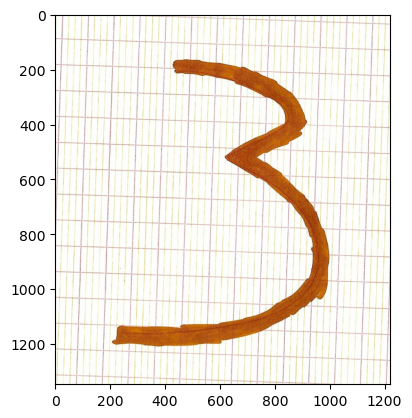

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_trois.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

* ### 4

<img src="./numéros/petit_quatre.jpg" 
     align="center" 
     width="250" />

Les résultats montrent une prédiction quasi-pafaite et quasi-systématique avec 88 % de bonnes réponses contre 3 % pour 2, 3 et 0. Et, les résultats semblent aussi performants à gauche de la caméra.

L'image a été chargée avec succès
1/1 [==============================] - 0s 159ms/step
Prédiction de cette image : 8.0
1/1 [==============================] - 0s 19ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3062551e-11
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]


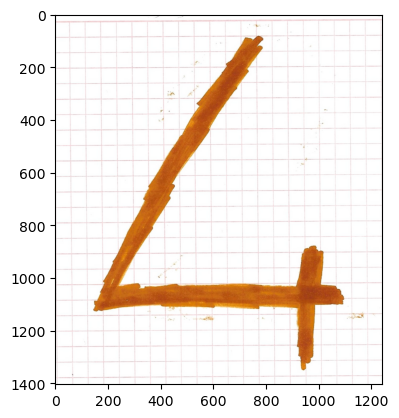

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_quatre.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

<img src="./numéros/grand_quatre.jpg" 
     align="center" 
     width="250" />

Les résultats chutent. Le modèle ne parvient pas à prédire le bon résultat. Il donne 2 dans 49 % du temps et 8 pour 36 %.

L'image a été chargée avec succès
1/1 [==============================] - 0s 407ms/step
Prédiction de cette image : 2.0
1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


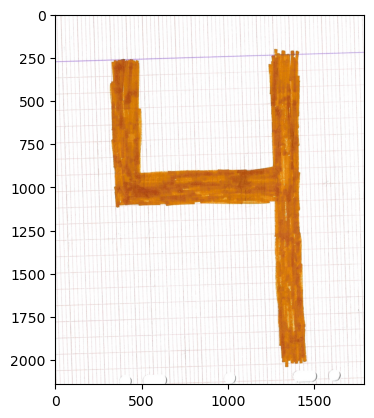

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\grand_quatre.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalite.

* ### 5

<img src="./numéros/petit_cinq.jpg" 
     align="center" 
     width="250" />

Les résultats obtenus sont les suivants : 49 % des réponses pour 2 et 37 % pour 0.

L'image a été chargée avec succès
1/1 [==============================] - 0s 146ms/step
Prédiction de cette image : 2.0
1/1 [==============================] - 0s 19ms/step
[[6.3512143e-34 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


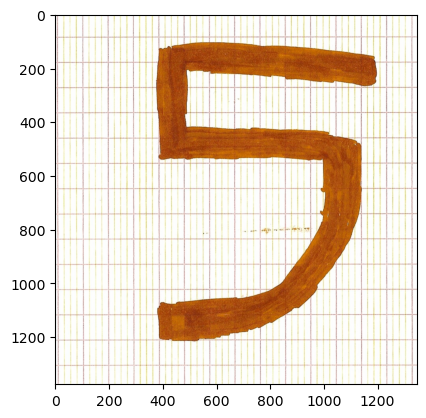

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_cinq.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

<img src="./numéros/grand_cinq.jpg" 
     align="center" 
     width="250" />

Les résultats sont les suivants : 49 % pour 5, 12 % pour 2 et 33 % pour 0 avec une meilleure performance à gauche de la caméra.

L'image a été chargée avec succès
1/1 [==============================] - 0s 150ms/step
Prédiction de cette image : 0.0
1/1 [==============================] - 0s 18ms/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  5.8404885e-11 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


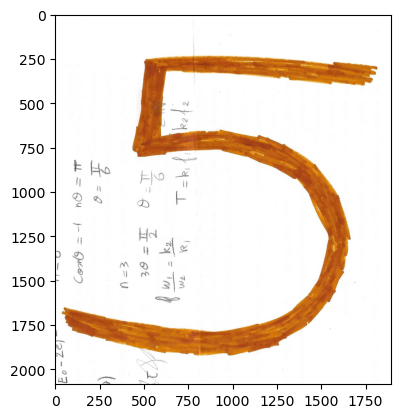

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\grand_cinq.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

* ### 6

<img src="./numéros/petit_six.jpg" 
     align="center" 
     width="250" />

Les résultats sont les suivants : 30 % pour 0, 32 % pour 2, 33 % pour 6 et 31 % pour 8 avec une meilleure performance à gauche de la caméra.

L'image a été chargée avec succès
1/1 [==============================] - 0s 153ms/step
Prédiction de cette image : 8.0
1/1 [==============================] - 0s 19ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.3386581e-08 0.0000000e+00 1.0000000e+00 0.0000000e+00]]


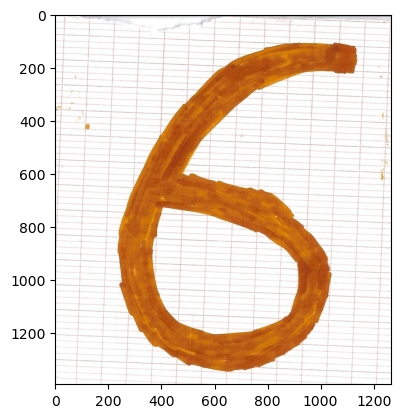

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_six.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

<img src="./numéros/grand_six.jpg" 
     align="center" 
     width="250" />

Les résultats sont les suivants : 32 % pour 8, 14 % pour 5 et 52 % pour 6 avec une meilleure performance à gauche de la caméra.

L'image a été chargée avec succès
1/1 [==============================] - 0s 163ms/step
Prédiction de cette image : 0.0
1/1 [==============================] - 0s 19ms/step
[[9.9999988e-01 0.0000000e+00 1.7904386e-33 0.0000000e+00 0.0000000e+00
  2.7385229e-24 0.0000000e+00 0.0000000e+00 1.4788485e-19 1.1964759e-07]]


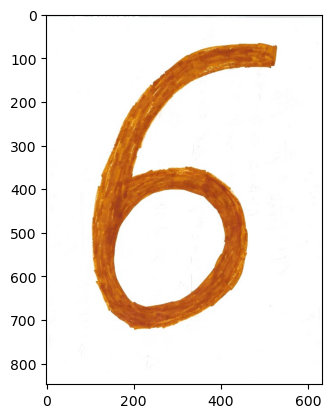

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\grand_six.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

* ### 7

<img src="./numéros/petit_sept.jpg" 
     align="center" 
     width="250" />

Les résultats sont les suivants : 57 % pour 2, 20 % pour 8 et 12 % pour 0. Le chiffre n'est jamais sorti lors du test. 

L'image a été chargée avec succès
1/1 [==============================] - 0s 161ms/step
Prédiction de cette image : 2.0
1/1 [==============================] - 0s 20ms/step
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5432782e-18 0.0000000e+00]]


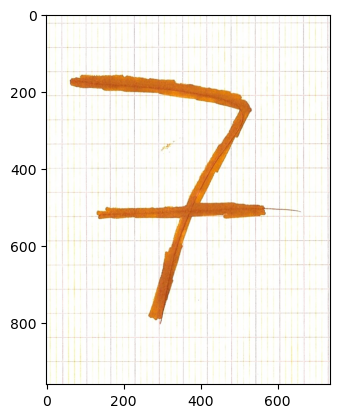

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_sept.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

<img src="./numéros/grand_sept.jpg" 
     align="center" 
     width="250" />

Les résultats sont les suivants : 48 % pour 0, et 39 % pour 7 avec une meilleure performance au milieu de la caméra.

L'image a été chargée avec succès
1/1 [==============================] - 0s 175ms/step
Prédiction de cette image : 2.0
1/1 [==============================] - 0s 19ms/step
[[3.1991327e-08 0.0000000e+00 1.0000000e+00 2.8916192e-31 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0919376e-26]]


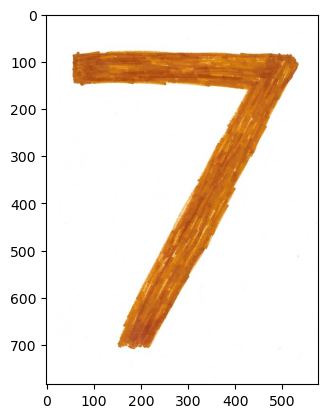

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\grand_sept.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

* ### 8

<img src="./numéros/petit_huit.jpg" 
     align="center" 
     width="250" />

Les résultats sont les suivants : 70 % pour 8 et 26 % pour 0.

L'image a été chargée avec succès
1/1 [==============================] - 0s 151ms/step
Prédiction de cette image : 8.0
1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


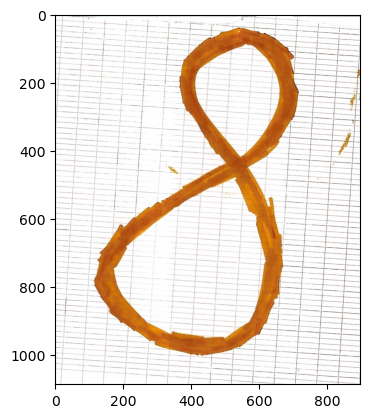

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_huit.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction correspond à la réalité.

* ### 9 

<img src="./numéros/petit_neuf.jpg" 
     align="center" 
     width="250" />

Les résultats sont les suivants : 29 % pour 9, 42 % pour 0 et 15 % pour 0 avec une meilleure performance à gauche de la caméra.

L'image a été chargée avec succès
1/1 [==============================] - 0s 303ms/step
Prédiction de cette image : 8.0
1/1 [==============================] - 0s 36ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 5.1357746e-37]]


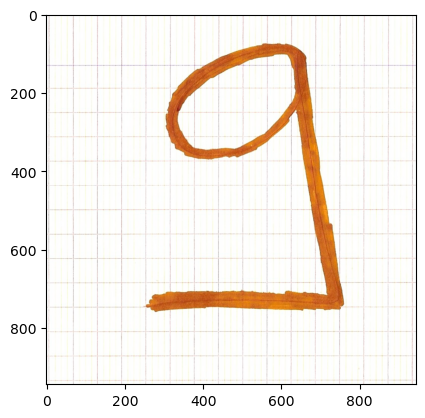

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\petit_neuf.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

<img src="./numéros/grand_neuf.jpg" 
     align="center" 
     width="250" />

Les résultats sont les suivants : 52 % pour 9 et 45% pour 0 avec une meilleure performance à gauche de la caméra.

L'image a été chargée avec succès
1/1 [==============================] - 0s 281ms/step
Prédiction de cette image : 2.0
1/1 [==============================] - 0s 33ms/step
[[0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 4.236488e-27 0.000000e+00 0.000000e+00]]


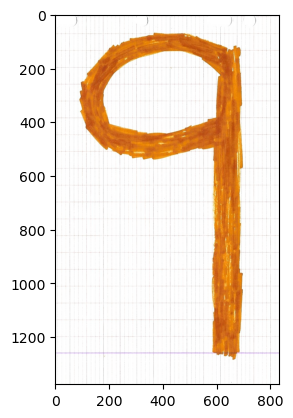

In [ ]:
try:
    image = cv2.imread("C:\\Users\cano9\Desktop\lol\grand_neuf.jpg",1)
    print("L'image a été chargée avec succès")
except FileNotFoundError:
    print("L'image n'existe pas")
    
# Charger le modèle de reconnaissance de chiffres pré-entraîné
model = tf.keras.models.load_model("mon_modele_mnist_convolutifs3.h5")

#Prétraiter l'image en niveaux de gris et en ajustant sa taille
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28))

# Prédire l'étiquette de l'image
tab = np.linspace(0,10,11)
input_img = np.expand_dims(gray,axis=0)
prediction = tab[np.argmax(model.predict(input_img))]
print("Prédiction de cette image :", prediction)
print(model.predict(input_img))

# Afficher l'image
plt.imshow(image)
plt.show()

La prédiction ne correspond pas à la réalité.

## Conclusion

Les perfomances de ce modèle sont clairement contrastées. Certes, il est capable de reconnaitre les chiffres en particulier le 0, le 2 et le 8. Néanmoins, l'épaisseur du chiffre, la localisation du chiffre et meme sa forme influencent sur les prédictions. De plus, les trois chiffres semblent facilement reconnaitre sont surreprésentés pour les autres chiffres . Par exemple, pour le "*petit sept*", les prédictions sont présentés sont 0, 2 et 8 et des remarques similaires peuvent etre faites pour 1. Pourtant, les chiffres sont presque représentés équitablement dans notre jeu de données. Ainsi, cela montre l'impact des jeu de données sur nos prédictions. Pour contrer cela, nous pouvons augmenter notre base de données avec de données, faire du data augmentation, du prétraitement d'image ou changer la structure de notre réseau de neurones.

In [ ]:
# Utilisez la fonction Counter pour compter les occurrences de chaque valeur dans le tableau
counts = Counter(y_train)

# Trouvez la longueur totale du tableau
length = len(x_train)

# Pour chaque valeur dans le tableau, calculez et affichez sa proportion dans le tableau
for value, count in counts.items():
    proportion = count / length
    print(f"La valeur {value} représente {proportion:.2f} du tableau")

La valeur 5 représente 0.09 du tableau
La valeur 0 représente 0.10 du tableau
La valeur 4 représente 0.10 du tableau
La valeur 1 représente 0.11 du tableau
La valeur 9 représente 0.10 du tableau
La valeur 2 représente 0.10 du tableau
La valeur 3 représente 0.10 du tableau
La valeur 6 représente 0.10 du tableau
La valeur 7 représente 0.11 du tableau
La valeur 8 représente 0.09 du tableau


## Fonctions qui peuvent etre utile

* Charger le modèle enregistré

In [ ]:
model = tf.keras.models.load_model("mon_modele_mnist.h5")

* Fusionner deux tableaux de memes dimensions

In [ ]:
x_train = np.vstack((x_train, input_img_x))

* Ajouter un élément au tableau

In [ ]:
array = np.append(array, 4)

* Sauvegader et charger un tableau de numpy

In [ ]:
import numpy as np

# Créer un tableau NumPy
array = np.array([[1, 2, 3], [4, 5, 6]])

# Sauvegarder le tableau dans un fichier
np.save("array.npy", array)

# Charger le tableau depuis le fichier
loaded_array = np.load("array.npy")

* Pour enregistrer un modèle de reconnaissance de chiffres pré-entrainé

In [ ]:
# Enregistrer le modèle
model.save("mon_modele_mnist.h5")